В ходе работы были рассмотрены и реализованы следующие алгоритмы:


*   Naive string matcher $O(|T|^2)$
*   Rabin-Karp: худший случай $O(|T| \cdot |W|)$, лучший $O(|T|)$
*   Boyer-Moore-Horspool: худший случай $O(|T| \cdot |W|)$, лучший $O(|T|/|W|)$
*   Knuth–Morris–Pratt



In [0]:
from benchmarks import benchmarks

Небольшая информация о bad данных

In [30]:
  text_names = []
  pattern_names = [] 
  text_length = []
  pattern_length = []
  for i in range(0, 4):
      text_names.append("bad" + "_t_" + str(i + 1) + ".txt")
      pattern_names.append("bad" + "_w_" + str(i + 1) + ".txt")
      handle_t_1 = open("./testdata/" + "bad" + "_t_" + str(i + 1) + ".txt"  , 'r')
      handle_w_1 = open("./testdata/" + "bad" + "_w_" + str(i + 1) + ".txt" , 'r')
      test_t_1 = handle_t_1.read()
      test_w_1 = handle_w_1.read()
      text_length.append(len(test_t_1))
      pattern_length.append(len(test_w_1))

  data1 = {'testdata text name':  text_names,
          'testdata pattern name':  pattern_names,
          'text length' : text_length,
          'pattern length': pattern_length,
          }

  df1 = pd.DataFrame (data1, columns = ['testdata text name','testdata pattern name',
                                      'text length', 'pattern length'])

  display(df1)

,testdata text name,testdata pattern name,text length,pattern length
0,bad_t_1.txt,bad_w_1.txt,10,2
1,bad_t_2.txt,bad_w_2.txt,100,10
2,bad_t_3.txt,bad_w_3.txt,1000,100
3,bad_t_4.txt,bad_w_4.txt,5000,1000


,testdata text name,testdata pattern name,algorithm,median time,std,number of comparisons
0,bad_t_1.txt,bad_w_1.txt,Naive string matcher,5.0,2.393220,18
1,bad_t_1.txt,bad_w_1.txt,Rabin-Karp,14.0,7.047063,2
2,bad_t_1.txt,bad_w_1.txt,Boyer-Moore-Horspool,19.5,5.455813,10
3,bad_t_1.txt,bad_w_1.txt,Knuth–Morris–Pratt,8.0,5.362835,18
4,bad_t_2.txt,bad_w_2.txt,Naive string matcher,15.0,5.935141,910
5,bad_t_2.txt,bad_w_2.txt,Rabin-Karp,43.0,15.409903,10
6,bad_t_2.txt,bad_w_2.txt,Boyer-Moore-Horspool,81.0,23.730729,100
7,bad_t_2.txt,bad_w_2.txt,Knuth–Morris–Pratt,34.0,17.684374,190
8,bad_t_3.txt,bad_w_3.txt,Naive string matcher,152.5,6.783590,90100
9,bad_t_3.txt,bad_w_3.txt,Rabin-Karp,361.0,18.980461,100


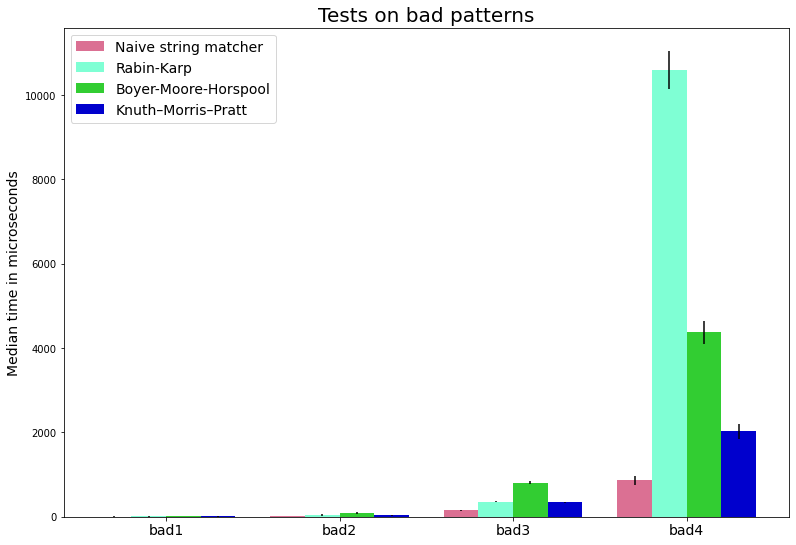

In [26]:
get_report("./testdata", "bad")

Небольшая информация о good данных

In [31]:
  text_names = []
  pattern_names = [] 
  text_length = []
  pattern_length = []
  for i in range(0, 4):
      text_names.append("good" + "_t_" + str(i + 1) + ".txt")
      pattern_names.append("dood" + "_w_" + str(i + 1) + ".txt")
      handle_t_1 = open("./testdata/" + "good" + "_t_" + str(i + 1) + ".txt"  , 'r')
      handle_w_1 = open("./testdata/" + "good" + "_w_" + str(i + 1) + ".txt" , 'r')
      test_t_1 = handle_t_1.read()
      test_w_1 = handle_w_1.read()
      text_length.append(len(test_t_1))
      pattern_length.append(len(test_w_1))

  data2 = {'testdata text name':  text_names,
          'testdata pattern name':  pattern_names,
          'text length' : text_length,
          'pattern length': pattern_length,
          }

  df2 = pd.DataFrame (data2, columns = ['testdata text name','testdata pattern name',
                                      'text length', 'pattern length'])

  display(df2)

,testdata text name,testdata pattern name,text length,pattern length
0,good_t_1.txt,dood_w_1.txt,694,17
1,good_t_2.txt,dood_w_2.txt,1158,85
2,good_t_3.txt,dood_w_3.txt,3438,381
3,good_t_4.txt,dood_w_4.txt,10714,92


,testdata text name,testdata pattern name,algorithm,median time,std,number of comparisons
0,good_t_1.txt,good_w_1.txt,Naive string matcher,105.0,9.518802,10200
1,good_t_1.txt,good_w_1.txt,Rabin-Karp,404.0,16.406398,17
2,good_t_1.txt,good_w_1.txt,Boyer-Moore-Horspool,106.0,8.573791,80
3,good_t_1.txt,good_w_1.txt,Knuth–Morris–Pratt,144.0,8.571838,633
4,good_t_2.txt,good_w_2.txt,Naive string matcher,118.0,12.338861,51935
5,good_t_2.txt,good_w_2.txt,Rabin-Karp,683.5,20.269867,85
6,good_t_2.txt,good_w_2.txt,Boyer-Moore-Horspool,120.0,7.839362,107
7,good_t_2.txt,good_w_2.txt,Knuth–Morris–Pratt,165.0,11.404819,695
8,good_t_3.txt,good_w_3.txt,Naive string matcher,339.0,103.940635,621030
9,good_t_3.txt,good_w_3.txt,Rabin-Karp,5353.0,581.449455,381


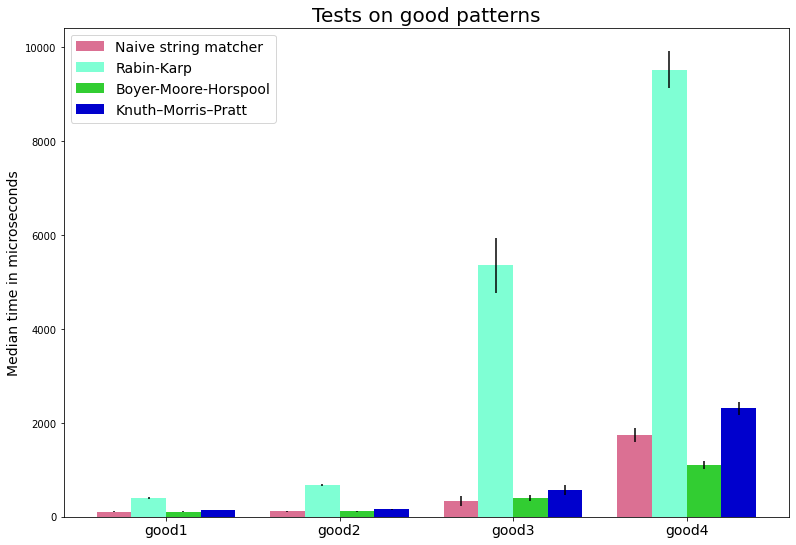

In [27]:
get_report("./testdata", "good")

## Выводы

Несмотря на то что наивный алгоритм обладал наихудшей средней и лучшей скоростью, он почти всегда показывает наилучший результат из-за отсутсвия необходимости предобработки данных. Алгоритм Рабина-Карпа всегда показывает наихудший результат, скорость работы в несколько раз превышает скорость работы остальных алгоритмов из-за времени подсчета hash-function.

На некоторых данных (например, good_4) алгоритм Боерф-Мура-Хорспула показывает наилучший результат по времени. 

Наименьшее число сравнений почти всегда у алгоритма Рабина-Карпа. Это говорит о возможной эффективности алгоритма при выборе быстрой hash-function.
